This notebook applies deep neural networks unsing tensorflow to predict housing prices. 

The data is from https://www.kaggle.com/harlfoxem/housesalesprediction

We first start off with some exploratory data analysis and feature engineering before we move on to create the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's check for null values 

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Data is clean, now to drop the id column as this feature has no impact on the label

In [5]:
df.drop('id',inplace=True,axis=1)

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

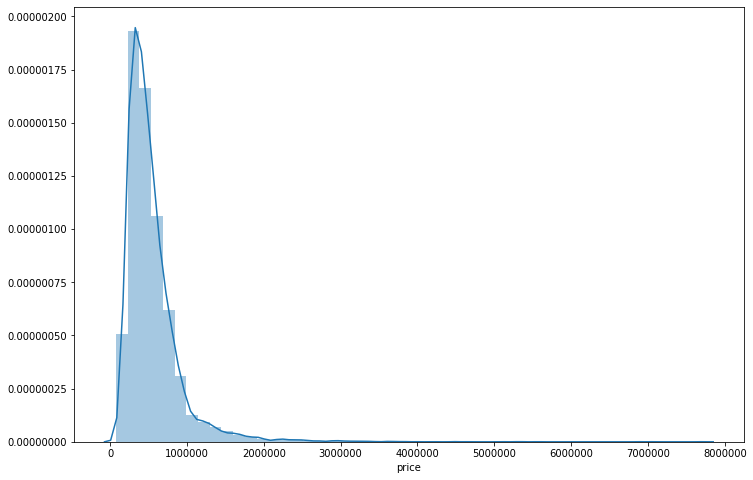

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

As zipcode has negative correlation I will drop it. sqft_living is the highest correlated so we'll explore that a little more

In [9]:
df.drop('zipcode',inplace=True,axis=1)

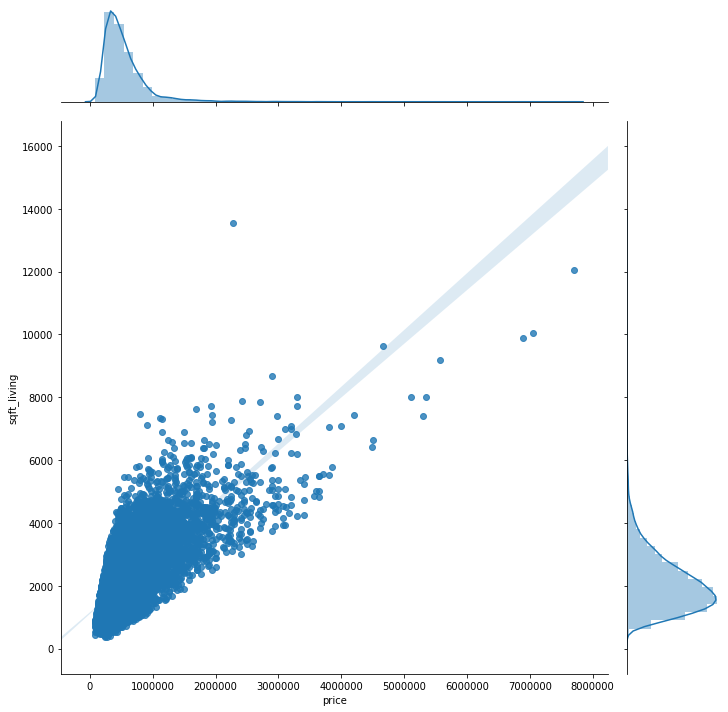

In [10]:
g = sns.JointGrid(x="price", y="sqft_living", data=df, height=10)
g = g.plot(sns.regplot, sns.distplot)

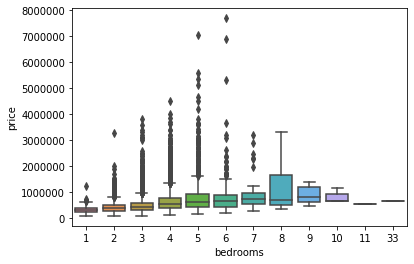

In [11]:
sns.boxplot(x='bedrooms', y='price', data=df)

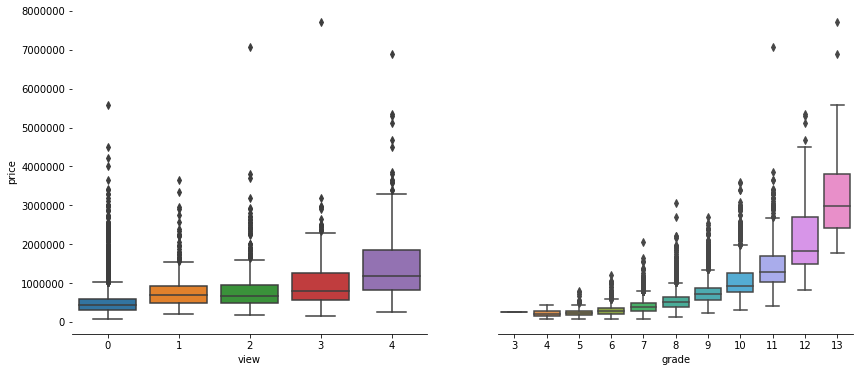

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,6))
sns.boxplot(x='view',y='price',data=df, ax=axes[0])
sns.boxplot(x='grade',y='price',data=df, ax=axes[1])

sns.despine(left=True)
axes[1].get_yaxis().set_visible(False)

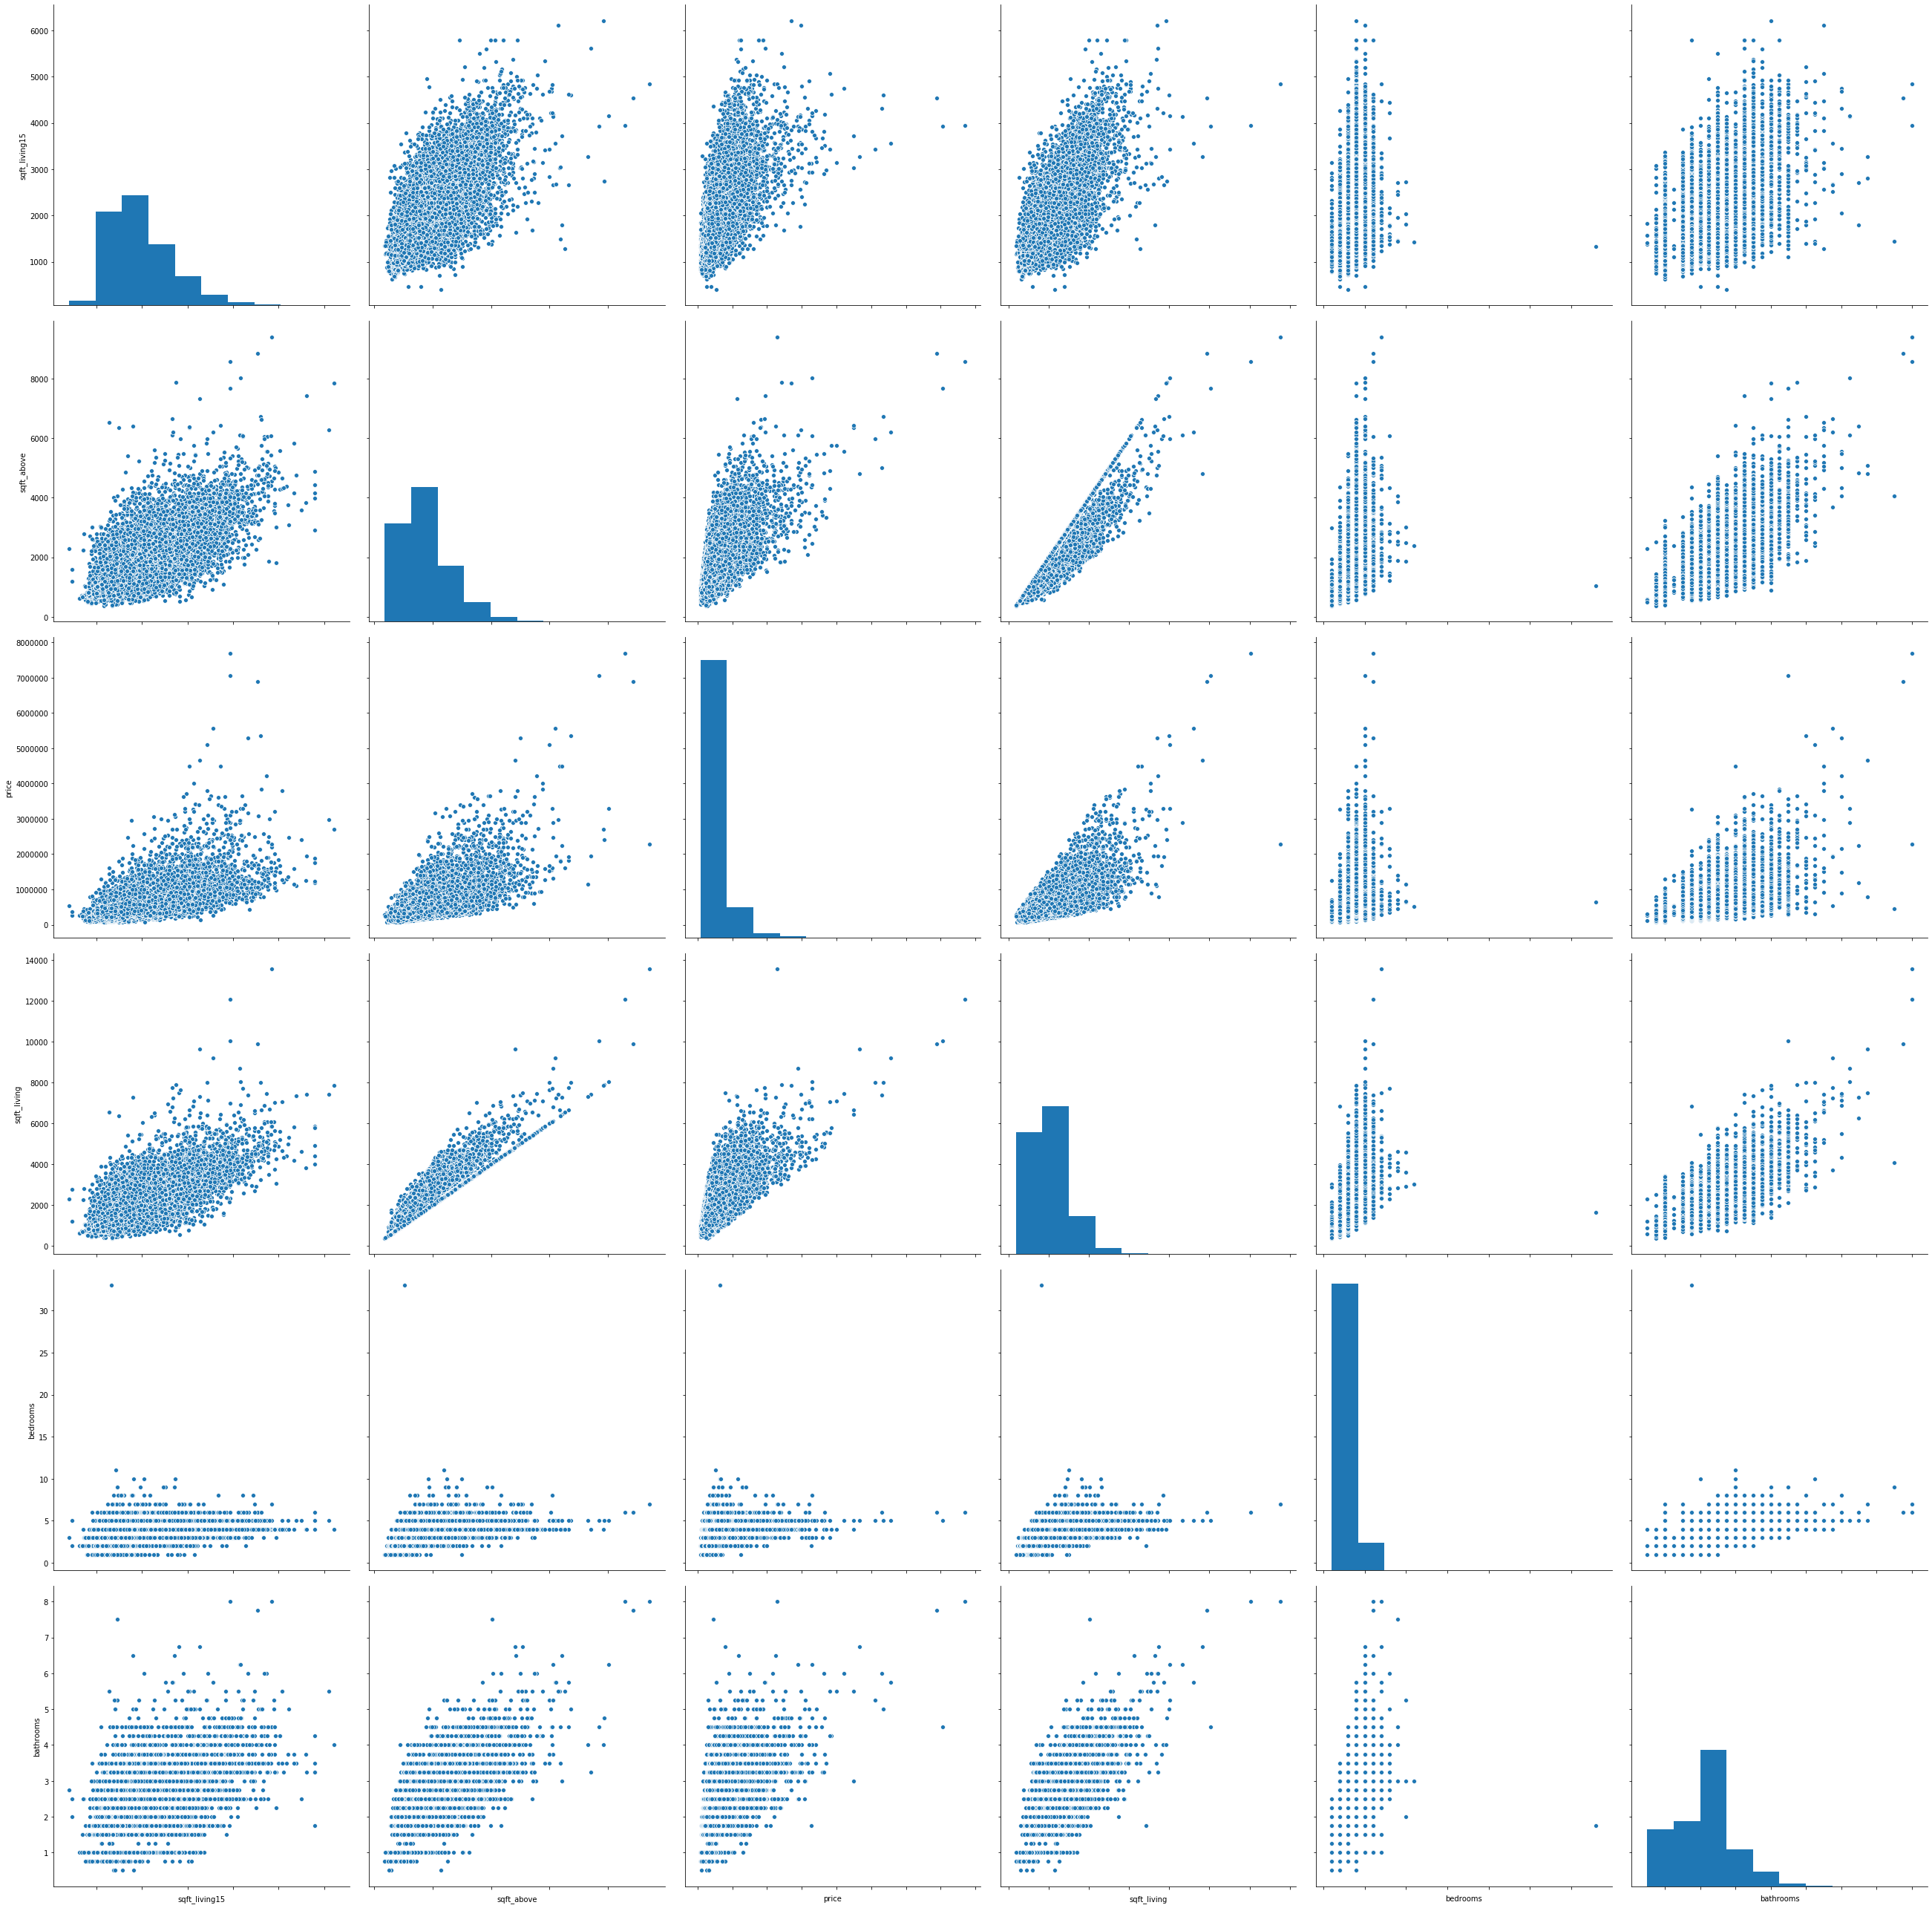

In [43]:
g = sns.pairplot(df[['sqft_living15','sqft_above','price','sqft_living','bedrooms','bathrooms']],height=6,diag_kind='hist') 
                                                                                    #diag_kind=hist to avoid Value Kind error
g.set(xticklabels=[])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(13), object(1)
memory usage: 3.1+ MB


Let's explore the date feature as it's the only object data type

In [16]:
df['date']=pd.to_datetime(df['date'])

In [17]:
df['month']=df['date'].apply(lambda date:date.month)

In [18]:
df['year']=df['date'].apply(lambda date:date.year)

In [19]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

<Figure size 792x504 with 0 Axes>

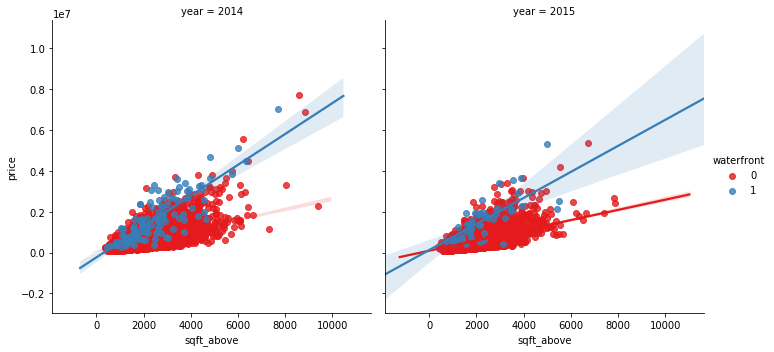

In [20]:
plt.figure(figsize=(11,7))
sns.lmplot(y='price',x='sqft_above',data=df, col='year',palette='Set1',hue='waterfront')

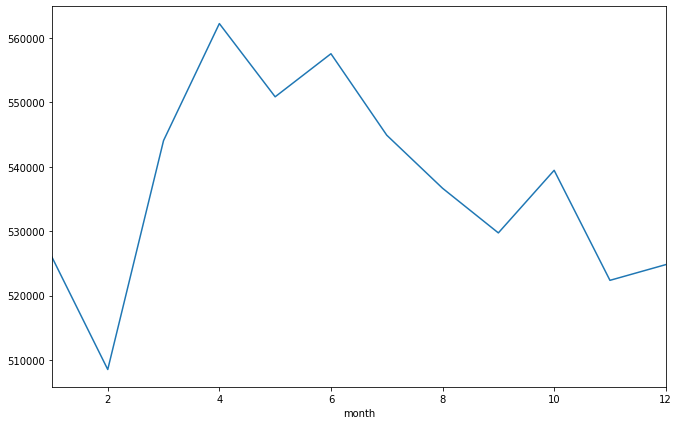

In [21]:
plt.figure(figsize=(11,7))
df.groupby('month').mean()['price'].plot()

In [22]:
df.drop('date', axis=1, inplace=True)

In [44]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

Scaling and train test split

In [24]:
X=df.drop('price',axis=1)
y=df['price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()

In [45]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Creating the model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.optimizers import Adam

In [31]:
model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [32]:
model.fit(X_train,y_train.values,validation_data=(X_test,y_test.values),batch_size=128,epochs=400)

Train on 14469 samples, validate on 7128 samples
Epoch 1/400
14469/14469 [==============================] - 1s 40us/sample - loss: 431855199227.6829 - val_loss: 416757286886.7161
Epoch 2/400
14469/14469 [==============================] - 0s 9us/sample - loss: 431773082087.4775 - val_loss: 416432951466.0920
Epoch 3/400
14469/14469 [==============================] - 0s 9us/sample - loss: 430209862558.6885 - val_loss: 412540241085.6296
Epoch 4/400
14469/14469 [==============================] - 0s 9us/sample - loss: 420315967192.7393 - val_loss: 393927301816.4579
Epoch 5/400
14469/14469 [==============================] - 0s 9us/sample - loss: 386298578503.9398 - val_loss: 341659383134.5275
Epoch 6/400
14469/14469 [==============================] - 0s 9us/sample - loss: 311602092453.3765 - val_loss: 247424842010.7206
Epoch 7/400
14469/14469 [==============================] - 0s 9us/sample - loss: 206650239108.6621 - val_loss: 146528123953.4186
Epoch 8/400
14469/14469 [======================

14469/14469 [==============================] - 0s 10us/sample - loss: 45956777764.5360 - val_loss: 44305335016.7273
Epoch 65/400
14469/14469 [==============================] - 0s 10us/sample - loss: 45741690381.3405 - val_loss: 43987284901.2076
Epoch 66/400
14469/14469 [==============================] - 0s 11us/sample - loss: 45547582644.1147 - val_loss: 43782720464.8799
Epoch 67/400
14469/14469 [==============================] - 0s 9us/sample - loss: 45332933311.0490 - val_loss: 43603965600.3232
Epoch 68/400
14469/14469 [==============================] - 0s 10us/sample - loss: 45147534989.9332 - val_loss: 43456122617.9663
Epoch 69/400
14469/14469 [==============================] - 0s 9us/sample - loss: 44920995420.5344 - val_loss: 43213063564.4983
Epoch 70/400
14469/14469 [==============================] - 0s 10us/sample - loss: 44729860530.5401 - val_loss: 43070490198.7699
Epoch 71/400
14469/14469 [==============================] - 0s 10us/sample - loss: 44545624956.8595 - val_loss: 

Epoch 128/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35895971340.6328 - val_loss: 34794652397.3244
Epoch 129/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35820901042.3100 - val_loss: 34698687682.2267
Epoch 130/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35718828559.9591 - val_loss: 34628585736.3322
Epoch 131/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35618825336.2416 - val_loss: 34562320878.1863
Epoch 132/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35580561930.0850 - val_loss: 34482133228.7497
Epoch 133/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35502713006.8068 - val_loss: 34444606352.5208
Epoch 134/400
14469/14469 [==============================] - 0s 10us/sample - loss: 35464803917.4069 - val_loss: 34395098510.7969
Epoch 135/400
14469/14469 [==============================] - 0s 9us/sample - loss: 35349947038.3

14469/14469 [==============================] - 0s 9us/sample - loss: 33242356947.8206 - val_loss: 32229192341.9798
Epoch 192/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33206522017.6432 - val_loss: 32218943138.6218
Epoch 193/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33169166869.1962 - val_loss: 32174137854.2761
Epoch 194/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33156086577.1335 - val_loss: 32173912155.9416
Epoch 195/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33144694928.5164 - val_loss: 32137319301.0281
Epoch 196/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33104591404.8341 - val_loss: 32093856948.4355
Epoch 197/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33077329993.8860 - val_loss: 32100335593.0146
Epoch 198/400
14469/14469 [==============================] - 0s 9us/sample - loss: 33103288242.3631 - val_loss:

14469/14469 [==============================] - 0s 9us/sample - loss: 32066302801.5470 - val_loss: 30937784315.4029
Epoch 255/400
14469/14469 [==============================] - 0s 9us/sample - loss: 32046639080.7868 - val_loss: 30929475356.4444
Epoch 256/400
14469/14469 [==============================] - 0s 9us/sample - loss: 32033418005.3908 - val_loss: 30891119014.9315
Epoch 257/400
14469/14469 [==============================] - 0s 9us/sample - loss: 32005928447.8938 - val_loss: 30941725347.7710
Epoch 258/400
14469/14469 [==============================] - 0s 9us/sample - loss: 32029272310.6404 - val_loss: 30881049736.7632
Epoch 259/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31982473575.5217 - val_loss: 30784726858.4153
Epoch 260/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31974455322.1856 - val_loss: 30772137230.0786
Epoch 261/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31997099345.7417 - val_loss:

14469/14469 [==============================] - 0s 9us/sample - loss: 31270031655.1192 - val_loss: 30021367543.6678
Epoch 318/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31251953110.0676 - val_loss: 29933577212.5522
Epoch 319/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31261606326.7864 - val_loss: 29908139199.9282
Epoch 320/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31275405825.5216 - val_loss: 29887525011.1066
Epoch 321/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31216517298.6285 - val_loss: 30046146730.0920
Epoch 322/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31223956417.6499 - val_loss: 29918485286.7879
Epoch 323/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31214036155.8996 - val_loss: 29865465444.5612
Epoch 324/400
14469/14469 [==============================] - 0s 9us/sample - loss: 31260235430.2080 - val_loss:

14469/14469 [==============================] - 0s 9us/sample - loss: 30834317416.8841 - val_loss: 29284485632.5746
Epoch 381/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30730878602.3239 - val_loss: 29342630071.8833
Epoch 382/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30735391173.7900 - val_loss: 29301609712.1975
Epoch 383/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30741946158.2318 - val_loss: 29259032205.9349
Epoch 384/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30713936776.1830 - val_loss: 29256415188.3277
Epoch 385/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30703787692.8960 - val_loss: 29409767534.3300
Epoch 386/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30724460342.6891 - val_loss: 29341976440.3861
Epoch 387/400
14469/14469 [==============================] - 0s 9us/sample - loss: 30713116163.1494 - val_loss:

In [33]:
loss=pd.DataFrame(model.history.history)

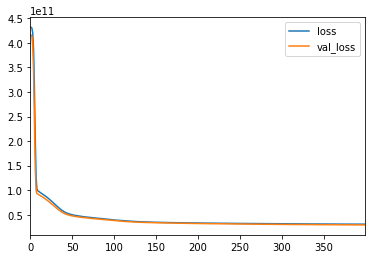

In [34]:
loss.plot()

Evaluations

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [36]:
predictions=model.predict(X_test)

In [37]:
mean_absolute_error(y_test,predictions)

104514.60877985584

In [38]:
np.sqrt(mean_squared_error(y_test,predictions))

170731.99523070198

In [39]:
explained_variance_score(y_test,predictions)

0.7758823049301643

In [40]:
df.describe()['price']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0, 0.5, 'Predicted Results')

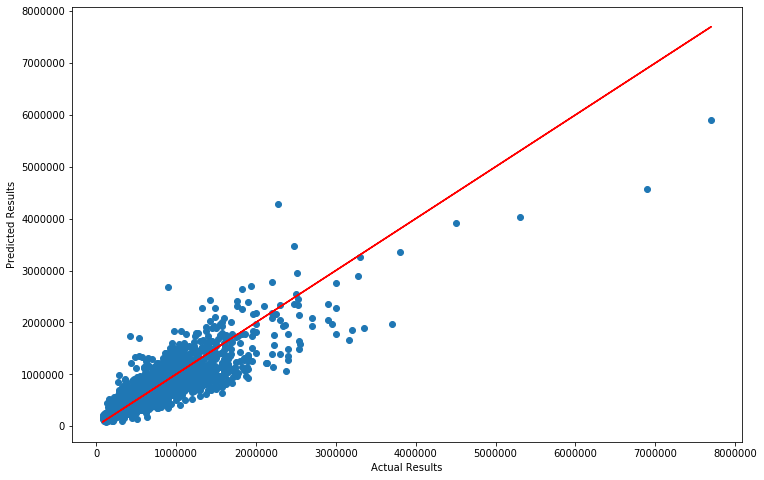

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

plt.xlabel('Actual Results')
plt.ylabel('Predicted Results')

It appears as though our models predictions on the most extreme house prices performed the worst so dealing with these in the earlier stages would perhaps prove to be useful